In [119]:
import pandas as pd
import plotly
from plotly import graph_objs
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, average_precision_score, confusion_matrix, roc_auc_score

In [120]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dvvsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dvvsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dvvsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dvvsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [121]:
df = pd.read_csv("data/labeled_data1.csv", index_col=0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [122]:
df.shape

(4303, 6)

In [123]:
no_hate = len(df[df['class'] == 0])
no_offensive = len(df[df['class'] == 1])
no_neutral = len(df[df['class'] == 2])

print(no_hate)
print(no_offensive)
print(no_neutral)

1429
2441
433


In [124]:
df = df.rename(columns={"class": 'target'})
df.head()

,count,hate_speech,offensive_language,neither,target,tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [125]:
df.target = df.target.replace([2], 1)
df.target = df.target.replace([0, 1], [1, 0])
df.target.value_counts()

0    2874
1    1429
Name: target, dtype: int64

In [126]:
df.tweet.head(20)

85     "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...
90     "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
111    "@DevilGrimz: @VigxRArts you're fucking gay, b...
186    "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...
204    "@NoChillPaz: "At least I'm not a nigger" http...
206    "@NotoriousBM95: @_WhitePonyJr_ Ariza is a sna...
221    "@RTNBA: Drakes new shoes that will be release...
263    "@TheoMaxximus: #GerrysHalloweenParty http://t...
317    "@ashlingwilde: @ItsNotAdam is bored supposed ...
320    "@bigbootybishopp: @white_thunduh lassen cc , ...
354    "@jayswaggkillah: Jackies a retard #blondeprob...
357    "@jgabsss: Stacey Dash won &#128166; http://t....
443    "Don't worry about the nigga you see, worry ab...
466    "Hey go look at that video of the man that fou...
528    "Let's kill cracker babies!". WTF did I just h...
535    "My grandma used to call me a porch monkey all...
540    "Nah its You @NoMeek_JustMilz: &#128514;&#1285...
549    "Our people". Now is the

In [127]:
def remove_users(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x))) # remove re-tweet
    df[col] = df[col].apply(lambda x: re.sub(r'(@[A-Za-z0-9-_]+)', '', str(x))) # remove tweeted at

In [128]:
remove_users(df, 'tweet')

In [129]:
df.tweet.head(20)

85                                    ":   queer" gaywad
90     ":  alsarabsss" hes a beaner smh you can tell ...
111    ":  you're fucking gay, blacklisted hoe" Holdi...
186    ": LMFAOOOO I HATE BLACK PEOPLE https://t.co/R...
204    ": "At least I'm not a nigger" http://t.co/RGJ...
206    ":  Ariza is a snake and a coward" but at leas...
221    ": Drakes new shoes that will be released by N...
263    ": #GerrysHalloweenParty http://t.co/3ycrSrnjH...
317    ":  is bored supposed to be cute, you faggot?"...
320    ":  lassen cc , the coach wants me" i feel it ...
354    ": Jackies a retard #blondeproblems" At least ...
357    ": Stacey Dash won &#128166; http://t.co/PDLG4...
443    "Don't worry about the nigga you see, worry ab...
466    "Hey go look at that video of the man that fou...
528    "Let's kill cracker babies!". WTF did I just h...
535    "My grandma used to call me a porch monkey all...
540    "Nah its You : &#128514;&#128514;&#128514;&#12...
549    "Our people". Now is the

In [130]:
def remove_links(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'http\S+', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'bit.ly/\S+', '', str(x)))

In [131]:
df.tweet.head(20)

85                                    ":   queer" gaywad
90     ":  alsarabsss" hes a beaner smh you can tell ...
111    ":  you're fucking gay, blacklisted hoe" Holdi...
186    ": LMFAOOOO I HATE BLACK PEOPLE https://t.co/R...
204    ": "At least I'm not a nigger" http://t.co/RGJ...
206    ":  Ariza is a snake and a coward" but at leas...
221    ": Drakes new shoes that will be released by N...
263    ": #GerrysHalloweenParty http://t.co/3ycrSrnjH...
317    ":  is bored supposed to be cute, you faggot?"...
320    ":  lassen cc , the coach wants me" i feel it ...
354    ": Jackies a retard #blondeproblems" At least ...
357    ": Stacey Dash won &#128166; http://t.co/PDLG4...
443    "Don't worry about the nigga you see, worry ab...
466    "Hey go look at that video of the man that fou...
528    "Let's kill cracker babies!". WTF did I just h...
535    "My grandma used to call me a porch monkey all...
540    "Nah its You : &#128514;&#128514;&#128514;&#12...
549    "Our people". Now is the

In [132]:
remove_links(df, 'tweet')

In [133]:
df.tweet.head(20)

85                                    ":   queer" gaywad
90     ":  alsarabsss" hes a beaner smh you can tell ...
111    ":  you're fucking gay, blacklisted hoe" Holdi...
186    ": LMFAOOOO I HATE BLACK PEOPLE  This is why t...
204                      ": "At least I'm not a nigger" 
206    ":  Ariza is a snake and a coward" but at leas...
221    ": Drakes new shoes that will be released by N...
263    ": #GerrysHalloweenParty  Halloween was yester...
317    ":  is bored supposed to be cute, you faggot?"...
320    ":  lassen cc , the coach wants me" i feel it ...
354    ": Jackies a retard #blondeproblems" At least ...
357    ": Stacey Dash won &#128166;  baddest bitch ev...
443    "Don't worry about the nigga you see, worry ab...
466    "Hey go look at that video of the man that fou...
528    "Let's kill cracker babies!". WTF did I just h...
535    "My grandma used to call me a porch monkey all...
540    "Nah its You : &#128514;&#128514;&#128514;&#12...
549    "Our people". Now is the

In [134]:
def remove_special_char(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'&[\S]+?;', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'#', ' ', str(x)))

In [135]:
remove_special_char(df, 'tweet')

In [136]:
df.tweet.head(20)

85                                          queer gaywad
90       alsarabsss hes a beaner smh you can tell hes...
111      youre fucking gay blacklisted hoe Holding ou...
186     LMFAOOOO I HATE BLACK PEOPLE  This is why the...
204                            At least Im not a nigger 
206      Ariza is a snake and a coward but at least h...
221     Drakes new shoes that will be released by Nik...
263     GerrysHalloweenParty  Halloween was yesterday...
317      is bored supposed to be cute you faggot Some...
320      lassen cc  the coach wants me i feel it youl...
354     Jackies a retard blondeproblems At least I ca...
357               Stacey Dash won   baddest bitch evaaaa
443    Dont worry about the nigga you see worry about...
466    Hey go look at that video of the man that foun...
528     Lets kill cracker babies WTF did I just hear WOW
535    My grandma used to call me a porch monkey all ...
540    Nah its You   yo i thought some1 photoshopped ...
549    Our people Now is the ti

In [137]:
def remove_whitespaces(df, col):
    """function to remove any double or more whitespaces to single and any leading and trailing whitespaces"""
    df[col] = df[col].apply(lambda x: re.sub(r'\s\s+', ' ', str(x))) 
    df[col] = df[col].apply(lambda x: re.sub(r'(\A\s+|\s+\Z)', '', str(x)))

In [138]:
remove_whitespaces(df, 'tweet')

In [139]:
df.tweet.head(20)

85                                          queer gaywad
90     alsarabsss hes a beaner smh you can tell hes a...
111    youre fucking gay blacklisted hoe Holding out ...
186    LMFAOOOO I HATE BLACK PEOPLE This is why there...
204                             At least Im not a nigger
206    Ariza is a snake and a coward but at least he ...
221    Drakes new shoes that will be released by Nike...
263    GerrysHalloweenParty Halloween was yesterday s...
317    is bored supposed to be cute you faggot Sometimes
320    lassen cc the coach wants me i feel it youll g...
354    Jackies a retard blondeproblems At least I can...
357                 Stacey Dash won baddest bitch evaaaa
443    Dont worry about the nigga you see worry about...
466    Hey go look at that video of the man that foun...
528     Lets kill cracker babies WTF did I just hear WOW
535    My grandma used to call me a porch monkey all ...
540    Nah its You yo i thought some1 photoshopped my...
549    Our people Now is the ti

In [140]:
def remove_numerics(df, col):
    """function to remove numbers or words with digits"""
    df[col] = df[col].apply(lambda x: re.sub(r'\w*\d\w*', r'', str(x)))

In [141]:
remove_numerics(df, 'tweet')

In [142]:
df.tweet.head(20)

85                                          queer gaywad
90     alsarabsss hes a beaner smh you can tell hes a...
111    youre fucking gay blacklisted hoe Holding out ...
186    LMFAOOOO I HATE BLACK PEOPLE This is why there...
204                             At least Im not a nigger
206    Ariza is a snake and a coward but at least he ...
221    Drakes new shoes that will be released by Nike...
263    GerrysHalloweenParty Halloween was yesterday s...
317    is bored supposed to be cute you faggot Sometimes
320    lassen cc the coach wants me i feel it youll g...
354    Jackies a retard blondeproblems At least I can...
357                 Stacey Dash won baddest bitch evaaaa
443    Dont worry about the nigga you see worry about...
466    Hey go look at that video of the man that foun...
528     Lets kill cracker babies WTF did I just hear WOW
535    My grandma used to call me a porch monkey all ...
540    Nah its You yo i thought  photoshopped my face...
549    Our people Now is the ti

In [143]:
def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    for token in word_tokens:    
        if token.lower not in stop_words and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

In [144]:
def tokenize_and_lemmatize(df, col):
    df[col] = df[col].apply(lambda x: tokenize(x))
    df.tweet = df.tweet.apply(lambda x: str(x)[1:-1])

In [145]:
tokenize_and_lemmatize(df, 'tweet')

In [146]:
df.head()

,count,hate_speech,offensive_language,neither,target,tweet
85,3,2,1,0,1,"'queer', 'gaywad'"
90,3,3,0,0,1,"'alsarabsss', 'hes', 'beaner', 'smh', 'you', '..."
111,3,3,0,0,1,"'youre', 'fuck', 'gay', 'blacklist', 'hoe', 'H..."
186,3,3,0,0,1,"'LMFAOOOO', 'HATE', 'BLACK', 'PEOPLE', 'This',..."
204,3,2,1,0,1,"'least', 'not', 'nigger'"


In [147]:
#Train-Validation-Test Split
hate = df[df.target == 1]
non_hate = df[df.target == 0]
non_hate.head()

,count,hate_speech,offensive_language,neither,target,tweet
1,3,0,3,0,0,"'boy', 'dats', 'coldtyga', 'dwn', 'bad', 'for'..."
2,3,0,3,0,0,"'Dawg', 'You', 'ever', 'fuck', 'bitch', 'and',..."
3,3,0,2,1,0,"'she', 'look', 'like', 'tranny'"
4,6,0,6,0,0,"'The', 'shit', 'you', 'hear', 'about', 'might'..."
5,3,1,2,0,0,"'The', 'shit', 'just', 'blow', 'meclaim', 'you..."


In [148]:
X_h = hate.tweet
y_h = hate.target
X_nh = non_hate.tweet
y_nh = non_hate.target

# perform 75-25 training-validation split and 15-10 validation-testing split on dataset
X_h_tr, X_h_val, y_h_tr, y_h_val = train_test_split(X_h, y_h, test_size=0.25, random_state=42)
X_h_val, X_h_tt, y_h_val, y_h_tt = train_test_split(X_h_val, y_h_val, test_size=0.4, random_state=42)
X_nh_tr, X_nh_val, y_nh_tr, y_nh_val = train_test_split(X_nh, y_nh, test_size=0.25, random_state=42)
X_nh_val, X_nh_tt, y_nh_val, y_nh_tt = train_test_split(X_nh_val, y_nh_val, test_size=0.4, random_state=42)

In [149]:
X_tr = pd.concat((X_h_tr, X_nh_tr), ignore_index=True)
y_tr = pd.concat((y_h_tr, y_nh_tr), ignore_index=True)
train = pd.concat([X_tr, y_tr], axis=1)

In [150]:
train.head()

,tweet,target
0,"'Dont', 'watch', 'you', 'beta', 'watch', 'your...",1
1,"'dont', 'give', 'fly', 'fuck', 'what', 'teabag...",1
2,"'Pennsylvania', 'white', 'trash', 'and', 'be',...",1
3,"'fuck', 'block', 'your', 'white', 'ass', 'beca...",1
4,"'you', 'look', 'like', 'welfare', 'bitch', 'co...",1


In [151]:
train.tweet

0       'Dont', 'watch', 'you', 'beta', 'watch', 'your...
1       'dont', 'give', 'fly', 'fuck', 'what', 'teabag...
2       'Pennsylvania', 'white', 'trash', 'and', 'be',...
3       'fuck', 'block', 'your', 'white', 'ass', 'beca...
4       'you', 'look', 'like', 'welfare', 'bitch', 'co...
                              ...                        
3221    'make', 'wise', 'argument', 'about', 'the', 'a...
3222    'Girl', 'you', 'eat', 'pussy', 'than', 'girl',...
3223    'This', 'bitch', 'childish', 'one', 'sisters',...
3224    'Gwyneth', 'Paltrow', 'you', 'ugly', 'ass', 'b...
3225    'After', 'you', 'get', 'do', 'run', 'train', '...
Name: tweet, Length: 3226, dtype: object

In [152]:
X_val = pd.concat((X_h_val, X_nh_val), ignore_index=True)
y_val = pd.concat((y_h_val, y_nh_val), ignore_index=True)
val = pd.concat([X_val, y_val], axis=1)

In [153]:
X_tt = pd.concat((X_h_tt, X_nh_tt), ignore_index=True)
y_tt = pd.concat((y_h_tt, y_nh_tt), ignore_index=True)
test = pd.concat([X_tt, y_tt], axis=1)

In [154]:
X_tr = train.tweet
X_val = val.tweet
y_tr = train.target
y_val = val.target

# vectorize tweets for modeling
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

In [155]:
def auc(X, y, model):
    """
        Function to calculate ROC-AUC Score based on predict_proba(X)
        where X is feature values, y is target values, and model is instantiated model variable
    """
    probs = model.predict_proba(X)[:,1] 
    return roc_auc_score(y, probs)

In [156]:
def aps(X, y, model):
    """
        Function to calculate PR-AUC Score based on predict_proba(X)
        where X is feature values, y is target values, and model is instantiated model variable
    """
    probs = model.predict_proba(X)[:,1]
    return average_precision_score(y, probs)

In [157]:

def get_metrics_confusion(X, y, y_pred, model):
    """
        Function to get accuracy, F1, ROC-AUC, recall, precision, PR-AUC scores followed by confusion matrix
        where X is feature dataset, y is target dataset, and model is instantiated model variable
    """
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = auc(X, y, model)
    rec = recall_score(y, y_pred)
    prec = precision_score(y, y_pred)
    pr_auc = aps(X, y, model)

    print('Accuracy: ', acc)
    print('F1 Score: ', f1)
    print('ROC-AUC: ', roc_auc)
    print('Recall: ', rec)
    print('Precision: ', prec)
    print('PR-AUC: ', pr_auc)
    
    cnf = confusion_matrix(y, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cnf.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cnf.flatten()/np.sum(cnf)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(cnf, annot=labels, fmt='', cmap='Blues', annot_kws={'size':14}, cbar=False, xticklabels=False, yticklabels=False)

Accuracy:  0.7348837209302326
F1 Score:  0.3826714801444044
ROC-AUC:  0.8151278270485938
Recall:  0.24766355140186916
Precision:  0.8412698412698413
PR-AUC:  0.7261396148943502


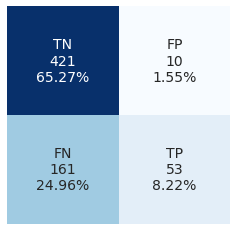

In [158]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pred_nb = nb.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_nb, nb)

Accuracy:  0.8
F1 Score:  0.6504065040650406
ROC-AUC:  0.8566526443610817
Recall:  0.5607476635514018
Precision:  0.7741935483870968
PR-AUC:  0.7651526769421582


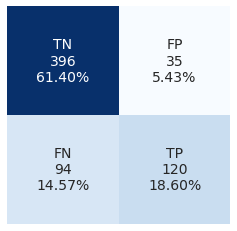

In [159]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pred_rf = rf.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_rf, rf)

Accuracy:  0.7984496124031008
F1 Score:  0.632768361581921
ROC-AUC:  0.8581705228007026
Recall:  0.5233644859813084
Precision:  0.8
PR-AUC:  0.7544766656494599


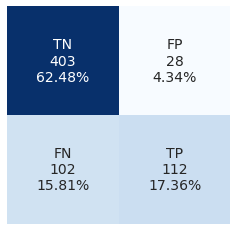

In [160]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pred_log = log.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_log, log)

Accuracy:  0.7984496124031008
F1 Score:  0.632768361581921
ROC-AUC:  0.8581705228007026
Recall:  0.5233644859813084
Precision:  0.8
PR-AUC:  0.7544766656494599


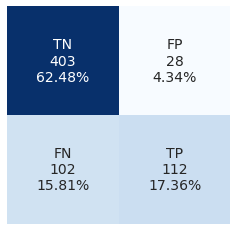

In [161]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pred_log = log.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_log, log)

Accuracy:  0.7937984496124031
F1 Score:  0.6395663956639566
ROC-AUC:  0.851556909599497
Recall:  0.5514018691588785
Precision:  0.7612903225806451
PR-AUC:  0.7318560508841966


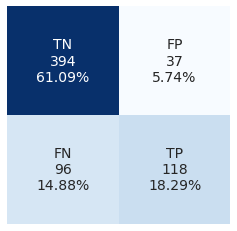

In [162]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_tr)
y_pred_gbc = gbc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_gbc, gbc)

Accuracy:  0.7317829457364341
F1 Score:  0.36630036630036633
ROC-AUC:  0.7714346119652189
Recall:  0.2336448598130841
Precision:  0.847457627118644
PR-AUC:  0.6367630251367774


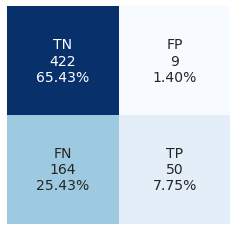

In [191]:
b_classifier = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 3),n_estimators = 10)
b_classifier = b_classifier.fit(tfidf_tr, y_tr)
y_pred_b = b_classifier.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_b, b_classifier)

Accuracy:  0.7906976744186046
F1 Score:  0.6633416458852868
ROC-AUC:  0.7916061322288961
Recall:  0.6214953271028038
Precision:  0.7112299465240641
PR-AUC:  0.6794576739777072


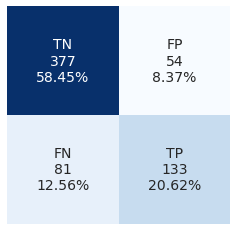

In [164]:
ab_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(tfidf_tr, y_tr)
y_pred_ab = ab_classifier.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_ab, ab_classifier)

In [165]:
def partition(x):

    # INSERT YOUR CODE HERE
    partition = {}
    
    for i in range(len(x)):
        if x[i] in partition:
            partition[x[i]].append(i)
        else:
            partition[x[i]] = [i]
    
    return partition

In [166]:

def entropy(y, weight):

    # INSERT YOUR CODE HERE
    entropy = 0
    c_0 = np.sum(weight[y==0])
    c_1 = np.sum(weight[y==1])
    
    c_sum = c_0+c_1

    probability_0 = c_0 / c_sum
    probability_1 = c_1 / c_sum

    if probability_0:
        entropy += probability_0 * math.log2(probability_0) * -1
    if probability_1:
        entropy += probability_1 * math.log2(probability_1) * -1
        
    return entropy

In [167]:

def mutual_information(x, y, weight):

    # INSERT YOUR CODE HERE
    dict_x = partition(x)

    entropy_y = entropy(y,weight)
    ans = 0

    for val in dict_x:
        indices = dict_x[val]
        entropy_val = entropy(y[indices],weight[indices])
        ans += (np.sum(weight[indices])/np.sum(weight)) * entropy_val
   
    return entropy_y - ans


In [168]:
def id3(x, y, weight, attribute_value_pairs=None, depth=0, max_depth=5):
    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.
    tree = {}
    if len(x)==0 or len(y)==0:
        return None

    uniq, count = np.unique(y, return_counts=True)

    if len(np.unique(y))==1:
        return y[0]
    
    if (attribute_value_pairs != None and len(attribute_value_pairs) == 0) or depth == max_depth:
        max_count = np.argmax(count)
        maximum = uniq[max_count]
        return maximum


    if attribute_value_pairs == None:
        attribute_value_pairs = []
        for i in range(len(x[0])):
            uniq_keys = partition(x[:,i])
            for key in uniq_keys:
                attribute_value_pairs.append((i,key))
    levels = depth

    mi_gains = []
    for (idx,val) in attribute_value_pairs:
        mi_gains.append(mutual_information(x[:,idx] == val, y, weight))

    best_attribute_value_pair = attribute_value_pairs[np.argmax(mi_gains)]
    best_index = best_attribute_value_pair[0]
    best_value = best_attribute_value_pair[1]

    new_attribute_value_pairs = []
    for i in attribute_value_pairs:
        if i != best_attribute_value_pair:
            new_attribute_value_pairs.append(i)

    attribute_value_pairs = new_attribute_value_pairs

    levels += 1
    t_condition = x[:,best_index] == best_value
    f_condition = x[:,best_index] != best_value

    x_true = x[t_condition]
    y_true = y[t_condition]
    w_true = weight[t_condition]

    x_false = x[f_condition]
    y_false = y[f_condition]
    w_false = weight[f_condition]

    if len(y_true):
        tree[best_index,best_value,True] = id3(x_true, y_true, w_true, attribute_value_pairs, depth=levels, max_depth=max_depth)
    if len(y_false):
        tree[best_index,best_value,False] = id3(x_false, y_false, w_false, attribute_value_pairs, depth=levels, max_depth=max_depth)

    return tree

In [169]:
def bagging(x,y,max_depth,num_trees):
    import random
    random.seed(0)
    len_x = len(x)
    list_x = list(range(len(x)))
    
    alpha = 1
    weight = np.ones(len_x)
    
    bagging_hyp = {}

    for num in range(num_trees):
        random_indices = random.choices(list_x,k=len_x)
        
        decision_tree = id3(x[random_indices], y[random_indices], weight, max_depth=max_depth)
        bagging_hyp[num] = (alpha,decision_tree)

    return bagging_hyp

In [170]:
def predict_base_learner(x, tree):

    if tree in range(20):
        return tree

    for keys in tree:

        if keys[1] == x[keys[0]] and keys[2] == True:
            return predict_base_learner(x,tree[keys])
        
        if keys[1] != x[keys[0]] and keys[2] == False:
            return predict_base_learner(x,tree[keys])

In [171]:

def predict_example(x, h_ens, ensemble_type):
    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.
    predictions = []
    if ensemble_type == "bagging":
        for k in h_ens:
            test_pred = predict_base_learner(x,h_ens[k][1])
            predictions.append(test_pred)

        predicted_example = max(predictions, key=predictions.count)
        return predicted_example
    else:
        sum = 0
        for y in h_ens:
            alpha, tree = h_ens[y]

            test_pred = predict_base_learner(x, tree)
            predictions.append(test_pred*alpha)

            sum += alpha
        
        predicted_example = np.sum(predictions) / sum

        if predicted_example >= 0.5:
            return 1
        else:
            return 0


In [172]:
def compute_error(y_true, y_pred):
    # INSERT YOUR CODE HERE
    n=len(y_pred)
    count=0
    for i in range(n):
        if y_true[i]!=y_pred[i]:
            count+=1
    return float(count)/float(n)

In [173]:
def conf_matrix(y_true,y_pred):
    true_positive,true_negative,false_positive,false_negative = 0,0,0,0

    for i in range(len(y_pred)):
        if y_pred[i] != 0 and y_true[i] != 0:
            true_positive += 1
        elif y_pred[i] == 0 and y_true[i] == 0:
            true_negative += 1
        elif y_pred[i] != 0 and y_true[i] == 0:
            false_positive += 1
        elif y_pred[i] == 0 and y_true[i] != 0:
            false_negative += 1
    
    confusion_mat = np.array([true_positive,false_negative,false_positive,true_negative]).reshape(2,2)

    print("\t\tClassifier Prediction")
    print("\t\t\tPositive\tNegative")
    print("Actual | Positive\t",confusion_mat[0][0],"\t\t",confusion_mat[0][1])
    print("Value  | Negative\t",confusion_mat[1][0],"\t\t",confusion_mat[1][1])

In [174]:
print("Bagging")
depth = 3
bag_size = 10
print("Bagging : max_depth =",depth,"bag_size = ",bag_size)
bag = bagging(tfidf_tr.toarray(), y_tr.to_numpy(), depth, bag_size)
y_pred = [predict_example(x, bag, "bagging") for x in tfidf_val.toarray()]

tst_err = compute_error(y_val.to_numpy(), y_pred)
print('Test Error = {0:4.2f}%.'.format(tst_err * 100))
print('test accuracy',accuracy(y_pred,y_val))
conf_matrix(y_val.to_numpy(),y_pred)

Bagging
Bagging : max_depth = 3 bag_size =  10
Test Error = 28.22%.
test accuracy 0.7178294573643411
		Classifier Prediction
			Positive	Negative
Actual | Positive	 36 		 178
Value  | Negative	 4 		 427


In [114]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))
def loss(x,w,y,b):
    s=sigmoid(x,w,b)
    return np.mean(-(y*np.log(s))- ((1-y)*np.log(1-s)))
def grad(x,y,w,b):
    s=sigmoid(x,w,b)    
    return np.dot(x.T,(s-y))/x.shape[0]

In [115]:
def accuracy(y_pred,y_test):
    return np.mean(y_pred==y_test)

In [116]:
def gradientdescent(x,y):
    w=np.zeros((x.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    loss_v=[]
    for i in range(ite):
        probability=sigmoid(x,w,b)
        l=loss(x,w,y,b)
        gradient=grad(x,y,w,b)
        w=w- (eta*gradient)
        b=b-(eta*np.sum(probability-y)/x.shape[0])
        loss_v.append(l)
        if i%100==0:
            print(l)
    return w,b,loss_v

In [117]:
w,b,loss_v=gradientdescent(tfidf_tr.toarray(),y_tr.to_numpy())
y_pred=sigmoid(tfidf_val.toarray(),w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_val))

0.6931471805599452
0.6026732826668685
0.5761113344922878
0.5542482033118138
0.5359284309535759
0.5203064666808405
0.5067741902497239
0.4948910995528331
0.4843328477478359
0.47485612585967557
test accuracy 0.7550387596899225
